In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

from society.agent import Agent, TrainableAgent
from society.simulations.weighted import WeightedNetworkSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.qlearning import TabularQLearningGameplayStrategy
from society.visualisation.network import *
from society.action import Action

plt.rcParams["figure.figsize"] = (10, 6)

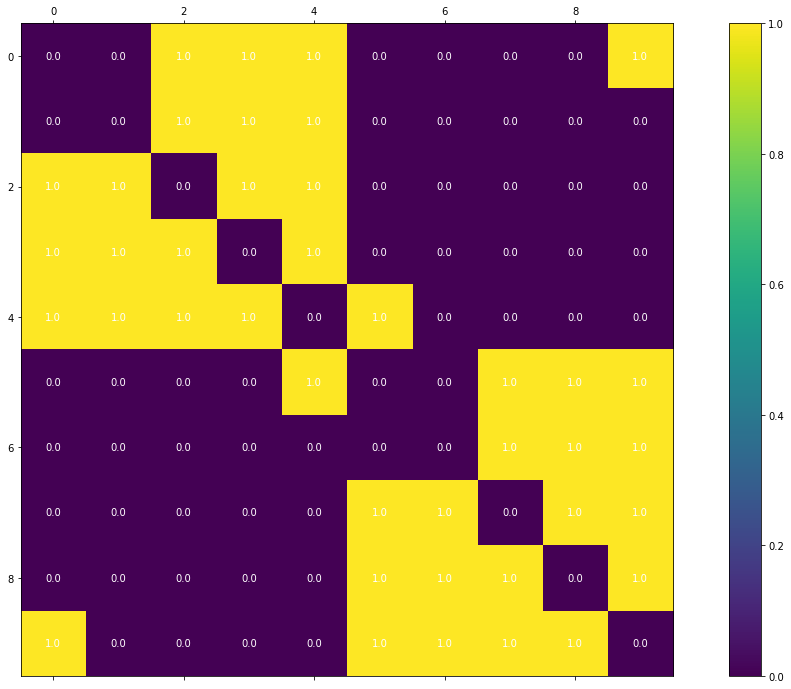

In [2]:
POPULATION = 10
agents = [
    Agent(TabularQLearningGameplayStrategy(lookback=3), i, POPULATION)
    for i in range(POPULATION)
]

G = nx.connected_caveman_graph(2, 5)

weights_matrix = np.zeros((POPULATION, POPULATION))
for u, v, d in G.edges(data=True):
    weights_matrix[u, v] = weights_matrix[v, u] = 1.0
    try:
        d["weight"] = weights_matrix[u, v]
    except:
        d["weight"] = 0

plot_matrix(weights_matrix, digits=2, figsize=(20, 12))

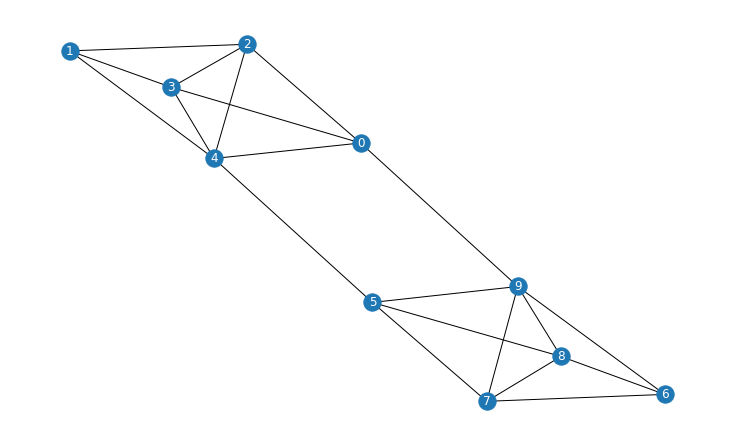

In [3]:
nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [4]:
sim = WeightedNetworkSimulation(agents, weights_matrix)
sim.reset()

for i in range(10000):
    sim.play_round()


[(8, 67134), (9, 65783), (4, 63831), (1, 58600), (7, 57213), (0, 56047), (2, 55580), (3, 54333), (5, 53718), (6, 46207)]


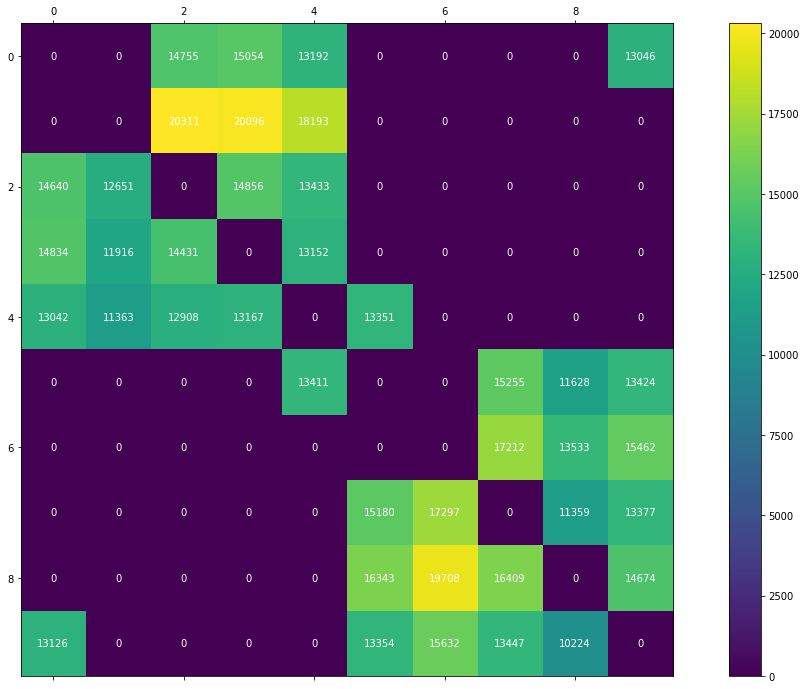

In [5]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.rewards]
ranked_partners = sorted([(i, sum(returns_matrix[i])) for i in range(POPULATION)], key=lambda x: x[1], reverse=True)
print(ranked_partners)

plot_matrix(returns_matrix, figsize=(20, 12))

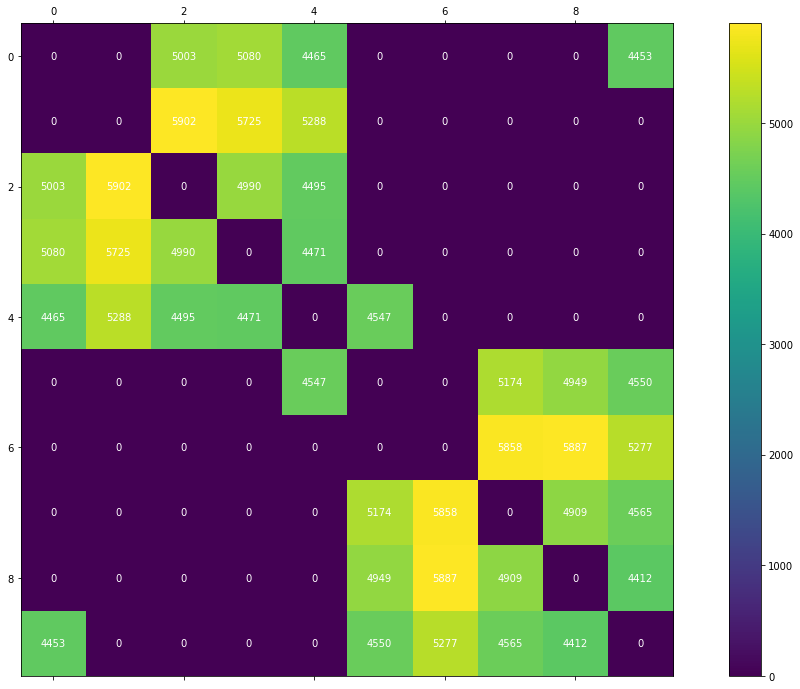

In [6]:
frequency_matrix = [[len(r) for r in agent] for agent in sim.rewards]

plot_matrix(frequency_matrix, figsize=(20, 12))

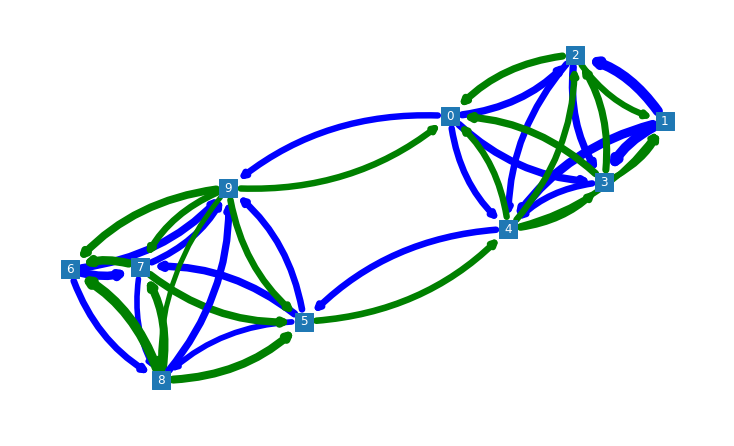

In [7]:
dg = nx.MultiDiGraph(G)

for u, v, d in dg.edges(data=True):
    try:
        d["weight"] = returns_matrix[u][v]
    except:
        d["weight"] = 0

plot_graph_spring(dg)

In [8]:
# nx.drawing.nx_pydot.write_dot(dg, "test8.dot")

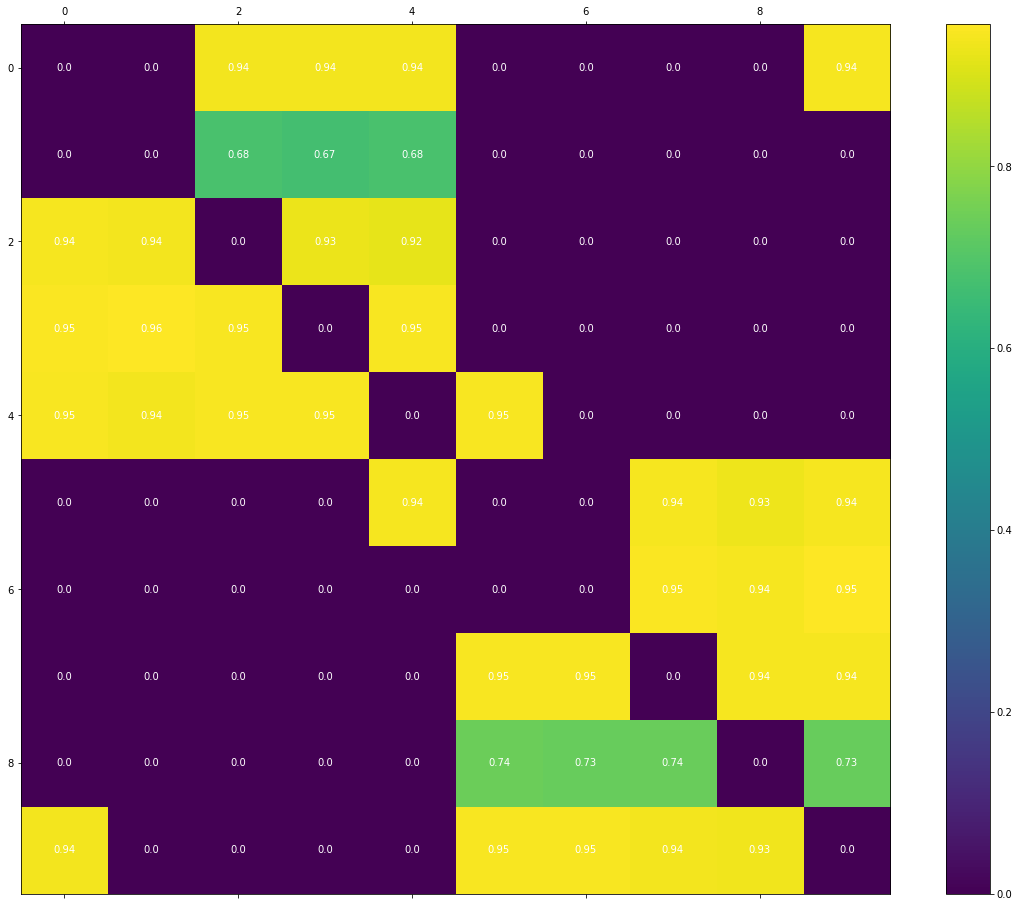

In [9]:
cooperativeness_matrix = [[r.count(Action.COOPERATE) / len(r) if r else 0 for r in agent] for agent in sim.action_histories]

plot_matrix(cooperativeness_matrix, figsize=(20, 16), digits=2)

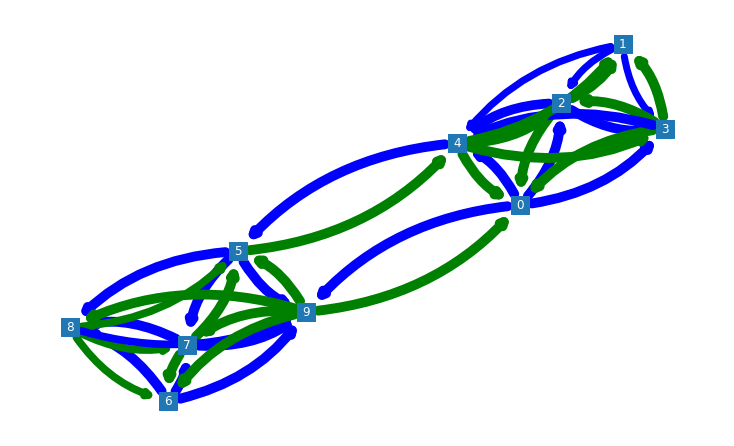

In [10]:
cooperativeness_graph = nx.MultiDiGraph(G)

for u, v, d in cooperativeness_graph.edges(data=True):
    try:
        d["weight"] = sim.action_histories[u][v].count(Action.COOPERATE) / len(sim.action_histories[u][v])
    except:
        d["weight"] = 0

plot_graph_spring(cooperativeness_graph)

# nx.drawing.nx_pydot.write_dot(dg, "test8-coop.dot")

In [11]:
policy = np.zeros((4, 4, 4))

for agent in agents:
    policy += agent.gameplay_strategy._q_table.argmax(axis=-1)

policy /= len(agents)

policy

array([[[0.1, 0. , 0. , 0. ],
        [0. , 0.2, 0. , 0.1],
        [0. , 0.1, 0. , 0. ],
        [0.1, 0. , 0.1, 0. ]],

       [[0.1, 0.1, 0.1, 0. ],
        [0.2, 0.1, 0.1, 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0.2, 0. ]],

       [[0.1, 0. , 0.1, 0.1],
        [0.1, 0.1, 0.2, 0.1],
        [0. , 0.2, 0.1, 0. ],
        [0. , 0.1, 0. , 0. ]],

       [[0.1, 0.1, 0.2, 0. ],
        [0.1, 0.1, 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]]])

In [12]:
actions = ["(C, C)", "(C, D)", "(D, C)", "(D, D)"]

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[round(policy[i, j, k])]:<4} [{round(policy[i, j, k], 5):05f}]")

(C, C)   (C, C)   (C, C)   => C    [0.100000]
(C, C)   (C, C)   (C, D)   => C    [0.000000]
(C, C)   (C, C)   (D, C)   => C    [0.000000]
(C, C)   (C, C)   (D, D)   => C    [0.000000]
(C, C)   (C, D)   (C, C)   => C    [0.000000]
(C, C)   (C, D)   (C, D)   => C    [0.200000]
(C, C)   (C, D)   (D, C)   => C    [0.000000]
(C, C)   (C, D)   (D, D)   => C    [0.100000]
(C, C)   (D, C)   (C, C)   => C    [0.000000]
(C, C)   (D, C)   (C, D)   => C    [0.100000]
(C, C)   (D, C)   (D, C)   => C    [0.000000]
(C, C)   (D, C)   (D, D)   => C    [0.000000]
(C, C)   (D, D)   (C, C)   => C    [0.100000]
(C, C)   (D, D)   (C, D)   => C    [0.000000]
(C, C)   (D, D)   (D, C)   => C    [0.100000]
(C, C)   (D, D)   (D, D)   => C    [0.000000]
(C, D)   (C, C)   (C, C)   => C    [0.100000]
(C, D)   (C, C)   (C, D)   => C    [0.100000]
(C, D)   (C, C)   (D, C)   => C    [0.100000]
(C, D)   (C, C)   (D, D)   => C    [0.000000]
(C, D)   (C, D)   (C, C)   => C    [0.200000]
(C, D)   (C, D)   (C, D)   => C   

In [21]:
best_agent = agents[ranked_partners[0][0]]

best_policy = best_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[best_policy[i, j, k]]:<4} {best_agent.gameplay_strategy._q_table[i, j, k]}")


(C, C)   (C, C)   (C, C)   => C    [226.24089909 218.01046894]
(C, C)   (C, C)   (C, D)   => C    [208.55709013  55.95522879]
(C, C)   (C, C)   (D, C)   => C    [219.76750523 172.50204827]
(C, C)   (C, C)   (D, D)   => C    [193.76548552  16.04204207]
(C, C)   (C, D)   (C, C)   => C    [218.08701586 127.34630185]
(C, C)   (C, D)   (C, D)   => D    [  0.27       102.96202381]
(C, C)   (C, D)   (D, C)   => C    [135.74969305   8.08773254]
(C, C)   (C, D)   (D, D)   => C    [7.27001655 0.5       ]
(C, C)   (D, C)   (C, C)   => C    [221.95862409 209.17809857]
(C, C)   (D, C)   (C, D)   => C    [197.10062245  28.10585538]
(C, C)   (D, C)   (D, C)   => C    [192.34410504  38.04253246]
(C, C)   (D, C)   (D, D)   => C    [26.22009137  0.5       ]
(C, C)   (D, D)   (C, C)   => C    [207.43260271  36.90224729]
(C, C)   (D, D)   (C, D)   => C    [32.98240956  0.        ]
(C, C)   (D, D)   (D, C)   => C    [45.58714098  0.1       ]
(C, C)   (D, D)   (D, D)   => C    [2.68950072 0.        ]
(C, D)

In [14]:
best_agent.gameplay_strategy._q_table

array([[[[2.26240899e+02, 2.18010469e+02],
         [2.08557090e+02, 5.59552288e+01],
         [2.19767505e+02, 1.72502048e+02],
         [1.93765486e+02, 1.60420421e+01]],

        [[2.18087016e+02, 1.27346302e+02],
         [2.70000000e-01, 1.02962024e+02],
         [1.35749693e+02, 8.08773254e+00],
         [7.27001655e+00, 5.00000000e-01]],

        [[2.21958624e+02, 2.09178099e+02],
         [1.97100622e+02, 2.81058554e+01],
         [1.92344105e+02, 3.80425325e+01],
         [2.62200914e+01, 5.00000000e-01]],

        [[2.07432603e+02, 3.69022473e+01],
         [3.29824096e+01, 0.00000000e+00],
         [4.55871410e+01, 1.00000000e-01],
         [2.68950072e+00, 0.00000000e+00]]],


       [[[2.20843789e+02, 1.54683482e+02],
         [1.52510438e+02, 3.50207531e+01],
         [1.80097360e+02, 2.37200536e+01],
         [2.69962250e+01, 0.00000000e+00]],

        [[1.22764057e+02, 1.02412391e+01],
         [6.68899755e-01, 0.00000000e+00],
         [1.47052630e+02, 2.78718436e+00],

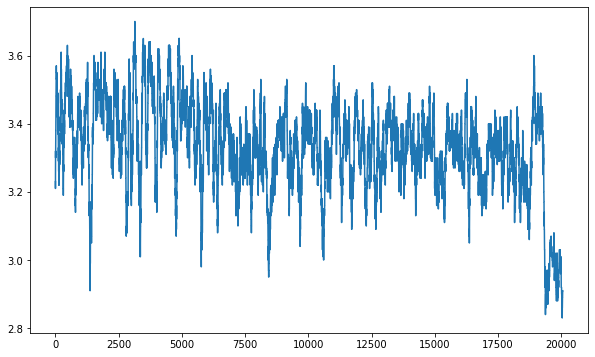

In [15]:
plt.plot(np.convolve(sim.reward_histories[ranked_partners[0][0]], np.ones(100), 'valid') / 100)

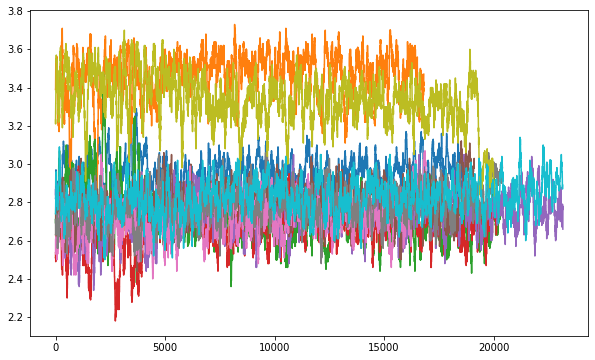

In [16]:
for partner in sim.reward_histories:
    plt.plot(np.convolve(partner, np.ones(100), 'valid') / 100)

In [20]:
worst_agent = agents[ranked_partners[-1][0]]

worst_policy = worst_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[worst_policy[i, j, k]]:<4}")


(C, C)   (C, C)   (C, C)   => C   
(C, C)   (C, C)   (C, D)   => C   
(C, C)   (C, C)   (D, C)   => C   
(C, C)   (C, C)   (D, D)   => C   
(C, C)   (C, D)   (C, C)   => C   
(C, C)   (C, D)   (C, D)   => C   
(C, C)   (C, D)   (D, C)   => C   
(C, C)   (C, D)   (D, D)   => C   
(C, C)   (D, C)   (C, C)   => C   
(C, C)   (D, C)   (C, D)   => C   
(C, C)   (D, C)   (D, C)   => C   
(C, C)   (D, C)   (D, D)   => C   
(C, C)   (D, D)   (C, C)   => C   
(C, C)   (D, D)   (C, D)   => C   
(C, C)   (D, D)   (D, C)   => C   
(C, C)   (D, D)   (D, D)   => C   
(C, D)   (C, C)   (C, C)   => C   
(C, D)   (C, C)   (C, D)   => C   
(C, D)   (C, C)   (D, C)   => C   
(C, D)   (C, C)   (D, D)   => C   
(C, D)   (C, D)   (C, C)   => C   
(C, D)   (C, D)   (C, D)   => C   
(C, D)   (C, D)   (D, C)   => C   
(C, D)   (C, D)   (D, D)   => C   
(C, D)   (D, C)   (C, C)   => C   
(C, D)   (D, C)   (C, D)   => C   
(C, D)   (D, C)   (D, C)   => C   
(C, D)   (D, C)   (D, D)   => C   
(C, D)   (D, D)   (C

In [23]:
policies = [
    agent.gameplay_strategy._q_table.argmax(axis=-1)
    for agent in agents
]

[
    ''.join([
        ('C', 'D')[policy[i, j, k]]
        for i, a in enumerate(actions)
        for j, b in enumerate(actions)
        for k, c in enumerate(actions)
    ])
    for policy in policies
]

['CCCCCCCDCDCCCCCCCDCCCCCCCCCCCCCCCCCCCCCDCCDCCCCCCDCCCCCCCCCCCCCC',
 'DCCCCDCCCCCCCCDCDCDCCCCCCCCCCCDCDCCCCDCCCDCCCCCCCCCCCCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCCDDCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCC',
 'CCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCDDCCCCCCCCCDCCCCCCCCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCCCCDCCCDCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCC',
 'CCCCCDCCCCCCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCCCCCCCCDCCCCCCCCCCCCC',
 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCDCDCCCCCCCCCCCCCCDCCCCCCCCCC']